# 나이브 베이즈 분류기 Naive Bayes Classifier
- 간단하고 강력한 분류 알고리즘
- 텍스트 분류 문제에 많이 사용
## 1. 개념
- 베이즈 정리를 기반으로 하는 확률적 분류 알고리즘
- Navie : 모든 특성이 서로 독립이라 가정한다는 뜻
    - 실제 성립하지 않더라도, 단순화된 가젇 덕분에 계산이 훨씬 쉬워지고 효율적인 분류기를 만들 수 있음
## 2. 용어
1. 베이즈 정리
- 조건부 확률을 계산하는 중요한 정리

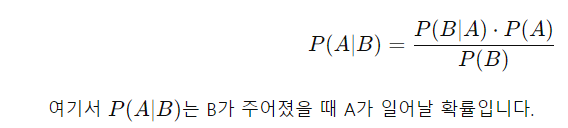

2. 사전 확률 Prior Probability
- 사건 A가 발생할 확률
- P(A)
3. 우도 Likelihood
- 클래스 C에 대해 데이터 포인트 X가 관측될 확률
- P(X|C)
4. 사후 확률 Posterior Probablity
- 데이터 X에 대해 특정 클래스 C에 속할 확률
- P(C|X)
## 3. 나이브 베이즈 분류기 종류
- 확률 분포의 형태에 따라 구분
1. 가우시안 나이브 베이즈 Gaussian Naive Bayes
- 연속형 데이터를 처리할 때 사용
- 각 특성이 정규 분포를 따른다고 가정
2. 멀티노미얼 나이브 베이즈 Multinomial Naive Bayes
- 텍스트 분류와 같이 이산적인 데이터를 처리할 때 사용
- 문서에서 단의 빈도수나 발생 횟수 등을 모델링
3. 베르누이 나이브 베이즈 Bernoulli Naive Bayes
- 이진 데이터를 처리할 때 사용
- 문서에서 단어가 존재하는지 여부 등을 모델링

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 초기화 및 훈련
model = GaussianNB()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.98


In [6]:
fish = pd.read_csv(r'https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
# 데이터 저장
fish_target = fish['Species'].to_numpy()
print(fish_target[:3])

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:3])

['Bream' 'Bream' 'Bream']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]]


In [9]:
# 훈련, 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:3])
print(test_scaled[:3])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]]


In [11]:
# 모델 초기화 및 훈련
model = GaussianNB()
model.fit(train_input, train_target)

GaussianNB()

In [12]:
# 예측
y_pred = model.predict(test_input)

# 정확도 평가
print(f"Accuracy: {accuracy_score(test_target, y_pred):.2f}")

Accuracy: 0.62
